In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
data = housing['data'].join(housing['target'])
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Check information about data. There 

In [4]:
data.isnull().any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

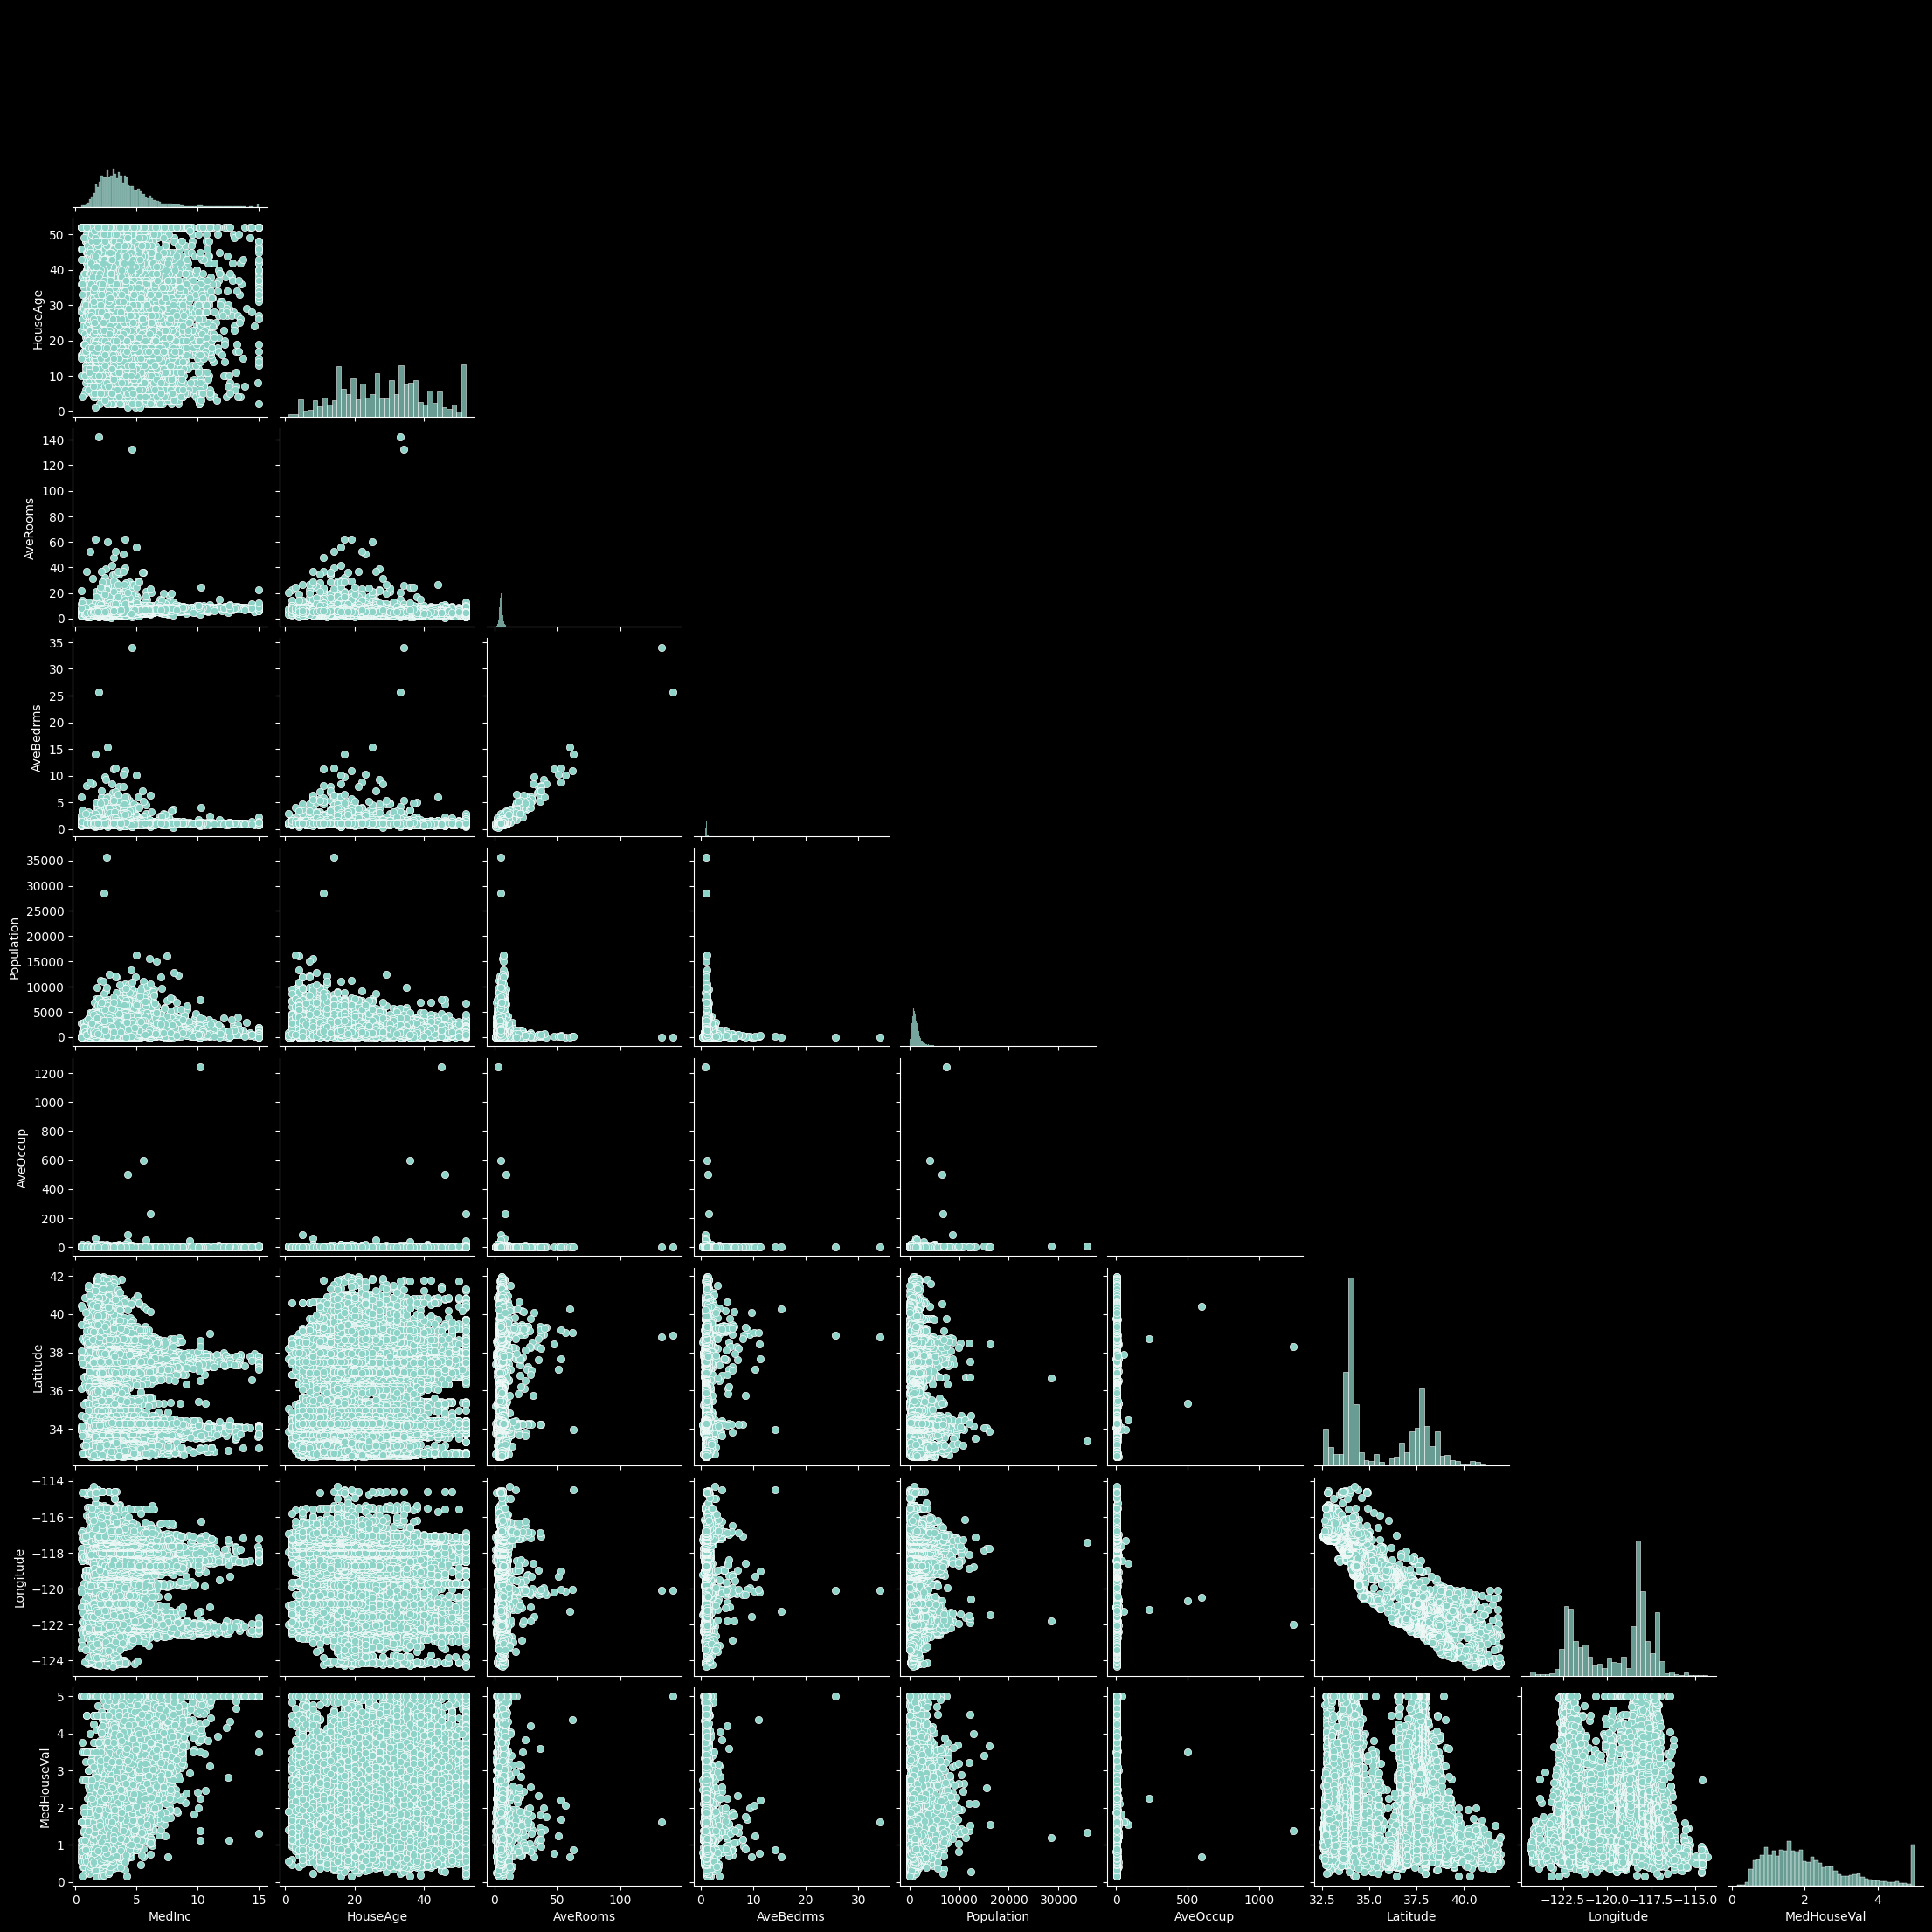

In [5]:
sns.pairplot(data, corner=True)

<Axes: xlabel='Longitude', ylabel='Latitude'>

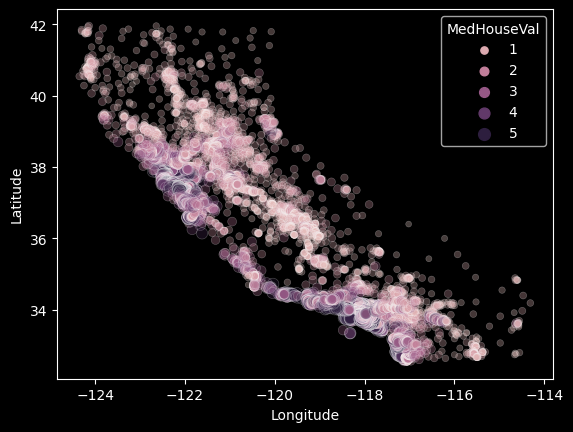

In [6]:
sns.scatterplot(
    data=data,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    alpha=0.3,
)

<Axes: >

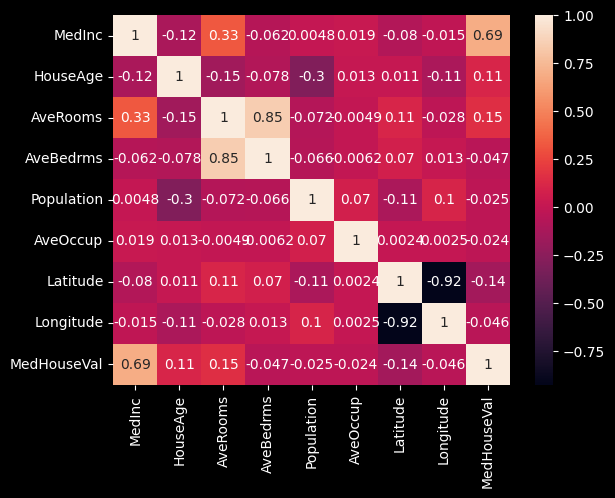

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
X = data.drop ('MedHouseVal', axis=1)
y = data['MedHouseVal']

In [10]:

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
reg_lin = LinearRegression()
reg_lin.fit(X_train,y_train)
pred_lin = reg_lin.predict(X_test)
lin_r2_score = r2_score(y_test, pred_lin)
lin_mse = mean_squared_error(y_test, pred_lin)


In [12]:
params = {'n_estimators':[200], 'max_features': [15],'max_depth': [5],'min_samples_leaf': [2]}

reg_forest = RandomForestRegressor()
gs = GridSearchCV(reg_forest,params, cv=15, n_jobs=-1) #validation for Random Forest
gs.fit (X_train, y_train)
reg_forest=gs.best_estimator_

pred_forest = reg_forest.predict (X_test)
rf_score = r2_score(y_test, pred_forest) 
rf_mse = mean_squared_error(y_test, pred_forest)


In [14]:
print('Linear Regression MSE: %.2f' %lin_mse)
print('Linear Regression R2: %.2f' %lin_r2_score)
print('Random Forest MSE: %.2f' %rf_mse)
print('Random Forest R2: %.2f' %rf_score)

Linear Regression MSE: 0.56
Linear Regression R2: 0.58
Random Forest MSE: 0.46
Random Forest R2: 0.65
